In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
Auto = pd.read_csv('Auto.csv')

In [5]:
# drop the records with missing horsepower, 
# and drop the name column since it's categorical with many levels

Auto = Auto[(Auto['horsepower']!='?')]
veh_names = Auto['name'] # store this for later
Auto = Auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
# standardize the data so that the components aren't biased by sizes of variable values

scaler = StandardScaler(with_std=True,
                        with_mean=True)
Auto_scaled = scaler.fit_transform(Auto)
pd.DataFrame(Auto_scaled)

,0,1,2,3,4,5,6,7
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [7]:
# add back the column names to make it easier to look at

Auto = pd.DataFrame(Auto_scaled, columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [8]:
PCA_Auto = PCA()

In [9]:
PCA_Auto.fit(Auto)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [10]:
PCA_Auto.components_

array([[-0.38586239,  0.4023885 ,  0.41644435,  0.40183594,  0.40157579,
        -0.2647309 , -0.21386777, -0.27786815],
       [ 0.07663269,  0.13842878,  0.12632499, -0.11148007,  0.21102   ,
         0.41690206,  0.6904632 , -0.50150064],
       [-0.29228579, -0.07223935, -0.07423622, -0.23605571,  0.00089399,
         0.63943514, -0.5871892 , -0.30732382],
       [-0.09998251,  0.21603551,  0.13581398,  0.11971643,  0.32246785,
         0.49280794,  0.10601968,  0.74328281],
       [ 0.74036644,  0.48261485,  0.30331627, -0.08426839, -0.13127292,
         0.09773197, -0.30134385, -0.04739508],
       [ 0.38735165, -0.53092548, -0.00699705,  0.6667096 ,  0.23585961,
         0.20293343, -0.11002592, -0.12086663],
       [ 0.19588516, -0.27878265,  0.08422855, -0.53504996,  0.72202073,
        -0.22891382, -0.12501506,  0.0345266 ],
       [-0.1151321 , -0.41774679,  0.82916553, -0.13477548, -0.30991105,
         0.03518826,  0.0542884 ,  0.07951102]])

In [11]:
# clean this up a bit

components = pd.DataFrame(PCA_Auto.components_, 
                          columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'])
components

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.385862,0.402389,0.416444,0.401836,0.401576,-0.264731,-0.213868,-0.277868
1,0.076633,0.138429,0.126325,-0.111480,0.211020,0.416902,0.690463,-0.501501
2,-0.292286,-0.072239,-0.074236,-0.236056,0.000894,0.639435,-0.587189,-0.307324
3,-0.099983,0.216036,0.135814,0.119716,0.322468,0.492808,0.106020,0.743283
4,0.740366,0.482615,0.303316,-0.084268,-0.131273,0.097732,-0.301344,-0.047395
5,0.387352,-0.530925,-0.006997,0.666710,0.235860,0.202933,-0.110026,-0.120867
6,0.195885,-0.278783,0.084229,-0.535050,0.722021,-0.228914,-0.125015,0.034527
7,-0.115132,-0.417747,0.829166,-0.134775,-0.309911,0.035188,0.054288,0.079511


In [12]:
# We can calculate scores for each component for each record in our data

pca_scores = PCA_Auto.transform(Auto)
display_scores = pd.merge(pd.DataFrame(PCA_Auto.transform(Auto), 
                          columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']), veh_names, left_index=True, right_index=True)
display_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,name
0,2.718381,-0.953771,0.213581,-0.522008,0.786394,-0.472255,0.105545,-0.118491,chevrolet chevelle malibu
1,3.541591,-1.061427,-0.035230,-0.336236,0.502548,-0.001474,-0.219929,0.068833,buick skylark 320
2,3.035163,-1.166696,-0.149187,-0.650133,0.749529,-0.218683,-0.138753,-0.089267,plymouth satellite
3,2.980879,-1.052720,0.167818,-0.464959,0.554874,-0.244313,-0.285929,-0.156933,amc rebel sst
4,2.970571,-1.239287,-0.154942,-0.773727,0.610288,-0.473948,0.015010,-0.177513,ford torino
...,...,...,...,...,...,...,...,...,...
387,-1.178756,1.354619,-0.646009,-0.780458,-0.624901,0.177398,0.149545,0.042639,chrysler lebaron medallion
388,-4.069557,2.142577,0.661808,1.122464,1.301926,0.764487,-0.251227,0.024485,ford granada l
389,-1.317097,0.675171,-1.746464,-1.760900,-0.225414,-0.040723,0.210015,0.065884,toyota celica gt
390,-1.747468,1.773452,0.069724,-0.367229,-0.440680,0.282103,-0.133691,-0.007674,dodge charger 2.2


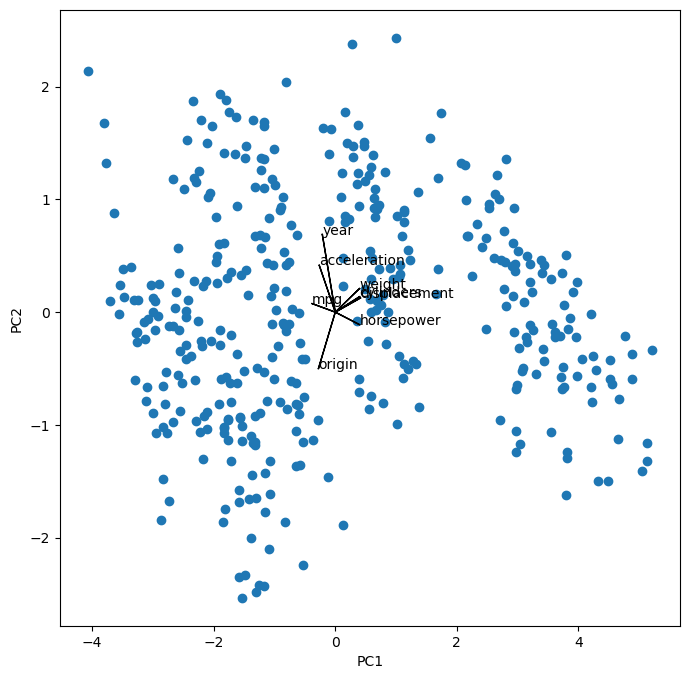

In [13]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(pca_scores[:,0], pca_scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(PCA_Auto.components_.shape[1]):
    ax.arrow(0, 0, PCA_Auto.components_[i,k], PCA_Auto.components_[j,k])
    ax.text(PCA_Auto.components_[i,k],
            PCA_Auto.components_[j,k],
            Auto.columns[k])

In [14]:
# Find the total variance explained by each component

PCA_Auto.explained_variance_

array([5.38962134, 0.94607672, 0.81371946, 0.4873993 , 0.18329415,
       0.11461431, 0.05368377, 0.0320513 ])

In [15]:
# Calculate these variances as percents
 
PCA_Auto.explained_variance_ratio_

array([0.67198404, 0.11795791, 0.10145546, 0.06076949, 0.02285332,
       0.01429024, 0.00669335, 0.00399619])

In [16]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(PCA_Auto.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        PCA_Auto.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

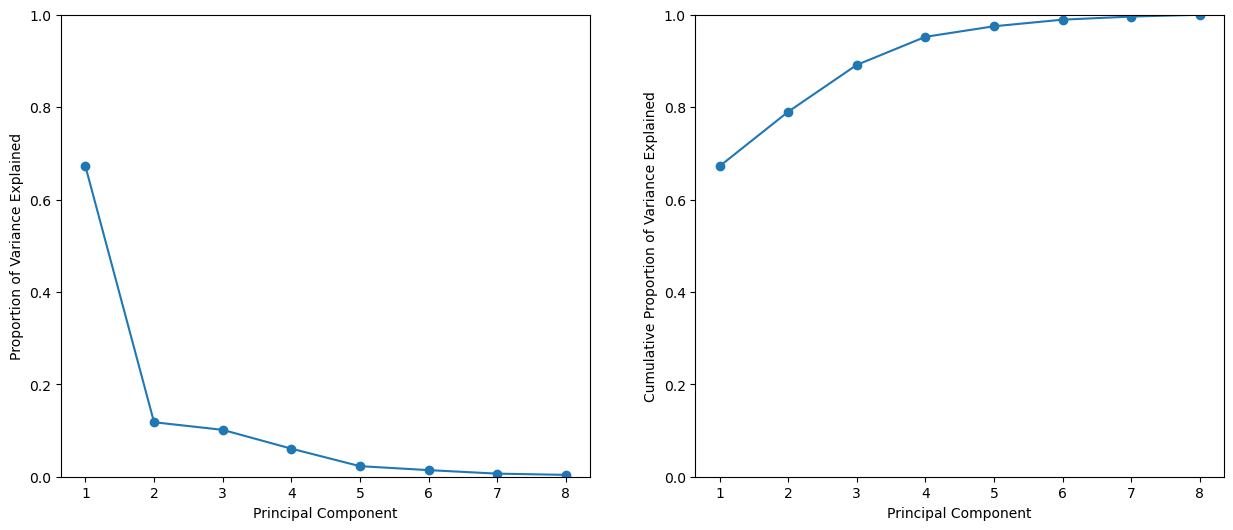

In [17]:
ax = axes[1]
ax.plot(ticks,
        PCA_Auto.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [ ]:
veh_names